In [1]:
import geopandas 
import pandas as pd
pd.set_option('max_colwidth', 200)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns 
sns.set()
import descartes
%matplotlib inline
from random import sample

lakes = geopandas.read_file("Lakes_and_Rivers")
madison = geopandas.read_file("City_Limit")

In [5]:
#metro data
metro_data = geopandas.read_file("MetroBusRoutes.gdb")
list_metro = []
for index, row in metro_data.iterrows():
    list_metro.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

metro_series = pd.Series(list_metro)
metro_coord = pd.DataFrame({"Coordinates": metro_series})
metro_coord = geopandas.GeoDataFrame(metro_coord, geometry='Coordinates')

#BRT data
brt_data = geopandas.read_file("BRT.gdb")
list_brt = []
for index, row in brt_data.iterrows():
    list_brt.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

brt_series = pd.Series(list_brt)
brt_coord = pd.DataFrame({"Coordinates": brt_series})
brt_coord = geopandas.GeoDataFrame(brt_coord, geometry='Coordinates')

In [6]:
#metro bus route data 2019
#http://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-routes
transit_data = geopandas.read_file("Metro_Transit_Bus_Route_Trips")
transit_data

,OBJECTID,PointsToLi,PointsTo_1,trips_rout,trips_ro_1,trips_ro_2,trips_ro_3,trips_ro_4,trips_ro_5,trips_ro_6,...,saturday,sunday,start_date,end_date,PK_MD_WE,ShapeSTLen,trips_ro20,trips_ro21,trips_ro22,geometry
0,22069,50881,50881,8298,1,85_WKD,874327,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
1,22070,50881,50881,8298,1,85_WKD,874326,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
2,22071,50881,50881,8298,1,85_WKD,874325,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
3,22072,50881,50881,8298,1,85_WKD,874324,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
4,22073,50881,50881,8298,1,85_WKD,874323,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
5,22074,50881,50881,8298,1,85_WKD,874322,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
6,22075,50882,50882,8298,1,85_WKD,874328,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."
7,22076,50882,50882,8298,1,85_WKD,874329,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."
8,22077,50882,50882,8298,1,85_WKD,874330,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."
9,22078,50882,50882,8298,1,85_WKD,874331,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."


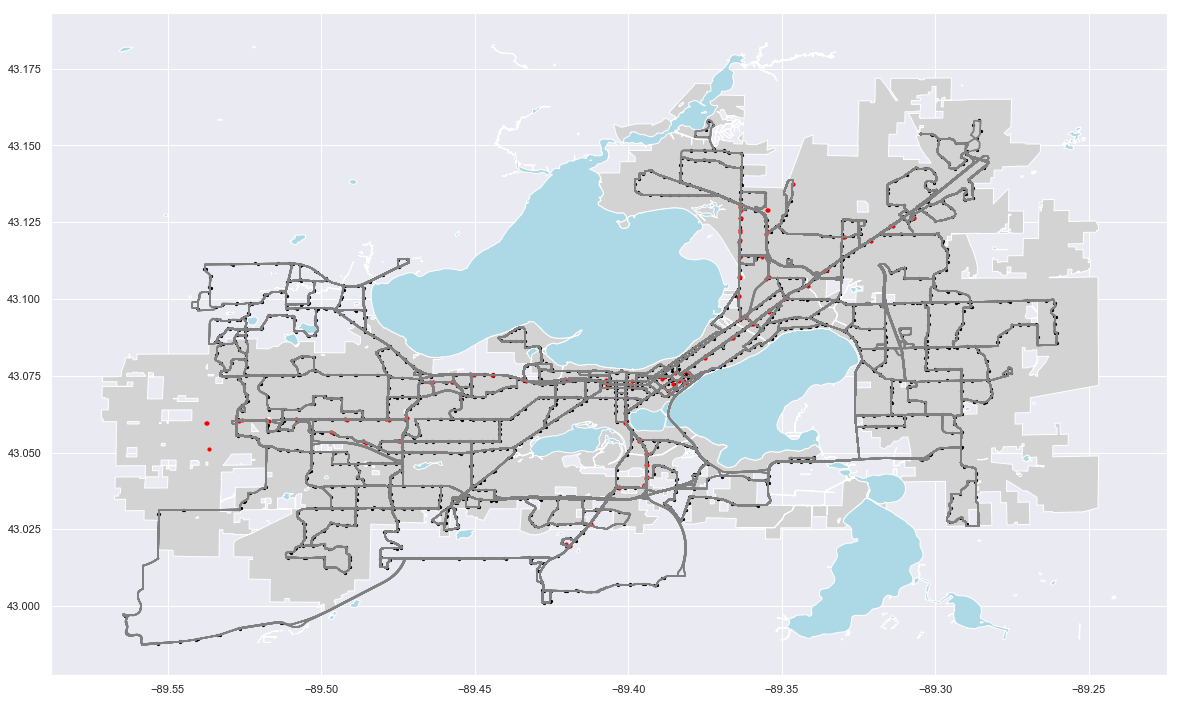

In [7]:
#mapping of the route line string
list_transit = []
for index, row in transit_data.iterrows():
    list_transit.append(row["geometry"])
    
transit_series = pd.Series(list_transit)
transit_coord = pd.DataFrame({"Coordinates": transit_series})
transit_coord = geopandas.GeoDataFrame(transit_coord, geometry='Coordinates')

ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
transit_coord.plot(color='grey', ax=ax)
metro_coord.plot(color="black", ax=ax, markersize= 5)
brt_coord.plot(color="red", ax=ax, markersize= 10)

In [10]:
transit_data_weekday = transit_data.loc[transit_data['service_na'].isin(['Standard Weekday','Weekday'])]
transit_data_weekday['trips_ro_1'].unique()


array([ 1,  2,  3,  4,  5,  6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 44, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 67, 70, 71, 72, 73,
       75, 80, 84], dtype=int64)

In [24]:
pd.set_option('max_colwidth', 30)

test = transit_data_weekday[transit_data_weekday['trips_ro_1']==6]

In [25]:
test

,OBJECTID,PointsToLi,PointsTo_1,trips_rout,trips_ro_1,trips_ro_2,trips_ro_3,trips_ro_4,trips_ro_5,trips_ro_6,...,saturday,sunday,start_date,end_date,PK_MD_WE,ShapeSTLen,trips_ro20,trips_ro21,trips_ro22,geometry
681,22750,50905,50905,8303,6,85_WKD,875735,E TOWNE: VIA MINERAL PT: V...,0,E Towne,...,0,0,20190303,20190511,100,88243.281601,None,None,None,LINESTRING (-89.4752452555...
682,22751,50905,50905,8303,6,85_WKD,875731,E TOWNE: VIA MINERAL PT: V...,0,E Towne,...,0,0,20190303,20190511,100,88243.281601,None,None,None,LINESTRING (-89.4752452555...
683,22752,50905,50905,8303,6,85_WKD,875727,E TOWNE: VIA MINERAL PT: V...,0,E Towne,...,0,0,20190303,20190511,100,88243.281601,None,None,None,LINESTRING (-89.4752452555...
684,22753,50906,50906,8303,6,85_WKD,875726,TO INGERSOLL ST: VIA MINER...,0,E Towne,...,0,0,20190303,20190511,000,38241.980363,None,None,None,LINESTRING (-89.4752452555...
685,22754,50907,50907,8303,6,85_WKD,875734,E TOWNE: VIA MINERAL PT: V...,0,E Towne,...,0,0,20190303,20190511,101,80061.291046,None,None,None,LINESTRING (-89.4752452555...
686,22755,50907,50907,8303,6,85_WKD,875692,E TOWNE: VIA MINERAL PT: V...,0,E Towne,...,0,0,20190303,20190511,101,80061.291046,None,None,None,LINESTRING (-89.4752452555...
687,22756,50907,50907,8303,6,85_WKD,875716,E TOWNE: VIA MINERAL PT: V...,0,E Towne,...,0,0,20190303,20190511,101,80061.291046,None,None,None,LINESTRING (-89.4752452555...
688,22757,50907,50907,8303,6,85_WKD,875720,E TOWNE: VIA MINERAL PT: V...,0,E Towne,...,0,0,20190303,20190511,101,80061.291046,None,None,None,LINESTRING (-89.4752452555...
689,22758,50907,50907,8303,6,85_WKD,875714,E TOWNE: VIA MINERAL PT: V...,0,E Towne,...,0,0,20190303,20190511,101,80061.291046,None,None,None,LINESTRING (-89.4752452555...
690,22759,50907,50907,8303,6,85_WKD,875721,E TOWNE: VIA MINERAL PT: V...,0,E Towne,...,0,0,20190303,20190511,101,80061.291046,None,None,None,LINESTRING (-89.4752452555...


In [26]:
test['trips_ro_4'].unique()

array(['E TOWNE: VIA MINERAL PT: VIA MATC & HAYES',
       'TO INGERSOLL ST: VIA MINERAL PT',
       'E TOWNE: VIA MINERAL PT: VIA HAYES',
       'TO FOREST RUN: VIA MINERAL PT: VIA HAYES',
       'CAPITOL SQUARE: VIA MINERAL PT',
       'E TOWNE: VIA MINERAL PT: VIA MATC',
       'E TOWNE: VIA TOKAY: VIA MATC & HAYES',
       'TO FOREST RUN: VIA TOKAY: VIA MATC & HAYES',
       'E TOWNE: VIA TOKAY: VIA HAYES', 'E TOWNE: VIA TOKAY: VIA MATC',
       'TO MATC: VIA TOKAY', 'WEST TFR PT: VIA HAYES & MATC: VIA TOKAY',
       'WEST TFR PT: VIA HAYES: VIA MINERAL PT',
       'WEST TFR PT: VIA MINERAL PT', 'WEST TFR PT: VIA MATC: VIA TOKAY',
       'WEST TFR PT: VIA HAYES: VIA TOKAY',
       'WEST TFR PT: VIA MATC: VIA MINERAL PT'], dtype=object)

In [38]:
test2 = test[test['trips_ro_4']=='E TOWNE: VIA MINERAL PT: VIA MATC & HAYES']
test3 = test[test['trips_ro_4']=='E TOWNE: VIA MINERAL PT: VIA HAYES']
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_columns', None)

In [39]:
test2

,OBJECTID,PointsToLi,PointsTo_1,trips_rout,trips_ro_1,trips_ro_2,trips_ro_3,trips_ro_4,trips_ro_5,trips_ro_6,trips_ro_7,trips_ro_8,trips_ro_9,trips_ro10,trips_ro11,trips_ro12,trips_ro13,trips_ro14,trips_ro15,trips_ro16,trips_ro17,trips_ro18,trips_ro19,service_id,service_na,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,PK_MD_WE,ShapeSTLen,trips_ro20,trips_ro21,trips_ro22,geometry
681,22750,50905,50905,8303,6,85_WKD,875735,E TOWNE: VIA MINERAL PT: VIA MATC & HAYES,0,E Towne,182844,50905,6M%,None,22500,1,MMT,None,E TOWNE:WEST TP,3,http://www.cityofmadison.com/Metro/schedules/Route06/,CC382C,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,100,88243.281601,None,None,None,"LINESTRING (-89.47524525559474 43.05397425588286, -89.47497525518763 43.05396925646912, -89.47485425545402 43.0539352567813, -89.47477425622156 43.05386825613051, -89.47472725635038 43.05377725636..."
682,22751,50905,50905,8303,6,85_WKD,875731,E TOWNE: VIA MINERAL PT: VIA MATC & HAYES,0,E Towne,182971,50905,6M%,None,27900,1,MMT,None,E TOWNE:WEST TP,3,http://www.cityofmadison.com/Metro/schedules/Route06/,CC382C,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,100,88243.281601,None,None,None,"LINESTRING (-89.47524525559474 43.05397425588286, -89.47497525518763 43.05396925646912, -89.47485425545402 43.0539352567813, -89.47477425622156 43.05386825613051, -89.47472725635038 43.05377725636..."
683,22752,50905,50905,8303,6,85_WKD,875727,E TOWNE: VIA MINERAL PT: VIA MATC & HAYES,0,E Towne,182836,50905,6M%,None,29700,1,MMT,None,E TOWNE:WEST TP,3,http://www.cityofmadison.com/Metro/schedules/Route06/,CC382C,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,100,88243.281601,None,None,None,"LINESTRING (-89.47524525559474 43.05397425588286, -89.47497525518763 43.05396925646912, -89.47485425545402 43.0539352567813, -89.47477425622156 43.05386825613051, -89.47472725635038 43.05377725636..."


In [42]:
test3

,OBJECTID,PointsToLi,PointsTo_1,trips_rout,trips_ro_1,trips_ro_2,trips_ro_3,trips_ro_4,trips_ro_5,trips_ro_6,trips_ro_7,trips_ro_8,trips_ro_9,trips_ro10,trips_ro11,trips_ro12,trips_ro13,trips_ro14,trips_ro15,trips_ro16,trips_ro17,trips_ro18,trips_ro19,service_id,service_na,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,PK_MD_WE,ShapeSTLen,trips_ro20,trips_ro21,trips_ro22,geometry
685,22754,50907,50907,8303,6,85_WKD,875734,E TOWNE: VIA MINERAL PT: VIA HAYES,0,E Towne,182975,50907,6MH,C,20700,1,MMT,None,E TOWNE:WEST TP,3,http://www.cityofmadison.com/Metro/schedules/Route06/,CC382C,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,101,80061.291046,None,None,None,"LINESTRING (-89.47524525559474 43.05397425588286, -89.47497525518763 43.05396925646912, -89.47485425545402 43.0539352567813, -89.47477425622156 43.05386825613051, -89.47472725635038 43.05377725636..."
686,22755,50907,50907,8303,6,85_WKD,875692,E TOWNE: VIA MINERAL PT: VIA HAYES,0,E Towne,182826,50907,6MH,None,54000,1,MMT,None,E TOWNE:WEST TP,3,http://www.cityofmadison.com/Metro/schedules/Route06/,CC382C,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,101,80061.291046,None,None,None,"LINESTRING (-89.47524525559474 43.05397425588286, -89.47497525518763 43.05396925646912, -89.47485425545402 43.0539352567813, -89.47477425622156 43.05386825613051, -89.47472725635038 43.05377725636..."
687,22756,50907,50907,8303,6,85_WKD,875716,E TOWNE: VIA MINERAL PT: VIA HAYES,0,E Towne,182856,50907,6MH,None,55800,1,MMT,None,E TOWNE:WEST TP,3,http://www.cityofmadison.com/Metro/schedules/Route06/,CC382C,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,101,80061.291046,None,None,None,"LINESTRING (-89.47524525559474 43.05397425588286, -89.47497525518763 43.05396925646912, -89.47485425545402 43.0539352567813, -89.47477425622156 43.05386825613051, -89.47472725635038 43.05377725636..."
688,22757,50907,50907,8303,6,85_WKD,875720,E TOWNE: VIA MINERAL PT: VIA HAYES,0,E Towne,182976,50907,6MH,None,57600,1,MMT,None,E TOWNE:WEST TP,3,http://www.cityofmadison.com/Metro/schedules/Route06/,CC382C,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,101,80061.291046,None,None,None,"LINESTRING (-89.47524525559474 43.05397425588286, -89.47497525518763 43.05396925646912, -89.47485425545402 43.0539352567813, -89.47477425622156 43.05386825613051, -89.47472725635038 43.05377725636..."
689,22758,50907,50907,8303,6,85_WKD,875714,E TOWNE: VIA MINERAL PT: VIA HAYES,0,E Towne,183093,50907,6MH,None,59400,1,MMT,None,E TOWNE:WEST TP,3,http://www.cityofmadison.com/Metro/schedules/Route06/,CC382C,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,101,80061.291046,None,None,None,"LINESTRING (-89.47524525559474 43.05397425588286, -89.47497525518763 43.05396925646912, -89.47485425545402 43.0539352567813, -89.47477425622156 43.05386825613051, -89.47472725635038 43.05377725636..."
690,22759,50907,50907,8303,6,85_WKD,875721,E TOWNE: VIA MINERAL PT: VIA HAYES,0,E Towne,182971,50907,6MH,None,61200,1,MMT,None,E TOWNE:WEST TP,3,http://www.cityofmadison.com/Metro/schedules/Route06/,CC382C,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,101,80061.291046,None,None,None,"LINESTRING (-89.47524525559474 43.05397425588286, -89.47497525518763 43.05396925646912, -89.47485425545402 43.0539352567813, -89.47477425622156 43.05386825613051, -89.47472725635038 43.05377725636..."
691,22760,50907,50907,8303,6,85_WKD,875712,E TOWNE: VIA MINERAL PT: VIA HAYES,0,E Towne,182975,50907,6MH,None,63000,1,MMT,None,E TOWNE:WEST TP,3,http://www.cityofmadison.com/Metro/schedules/Route06/,CC382C,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,101,80061.291046,None,None,None,"LINESTRING (-89.47524525559474 43.05397425588286, -89.47497525518763 43.05396925646912, -89.47485425545402 43.0539352567813, -89.47477425622156 43.05386825613051, -89.47472725635038 43.05377725636..."
692,22761,50907,50907,8303,6,85_WKD,875710,E TOWNE: VIA MINERAL PT: VIA HAYES,0,E Towne,182969,50907,6MH,None,66600,1,MMT,None,E TOW

In [51]:
test4 = transit_data_weekday.groupby(['trips_ro_1','trips_ro_4', 'ShapeSTLen']).size().reset_index(name='Freq')

In [58]:
test4

,trips_ro_1,trips_ro_4,ShapeSTLen,Freq
0,1,CAPITOL SQUARE,15170.038428,6
1,1,OLD UNIV AV: VIA CAMPUS,18125.059539,6
2,2,CAPITOL SQUARE,37428.248076,15
3,2,NORTH TFR PT: VIA FORDEM,56821.155994,16
4,2,NORTH TFR PT: VIA SHERMAN,57327.301479,22
5,2,TO SHEBOYGAN AV: VIA FORDEM,46382.724141,1
6,2,WEST TFR PT,37010.884509,9
7,2,WEST TFR PT: VIA FORDEM,55788.332162,15
8,2,WEST TFR PT: VIA SHERMAN,56269.022631,22
9,3,EAST TFR PT: VIA DIVISION,58300.733487,15


In [57]:
for index, row in test3:
    print(ST_Length(row['geometry']))
    break


ValueError: too many values to unpack (expected 2)

,trips_ro_1,trips_ro_4,Freq
0,6,CAPITOL SQUARE: VIA MINERA...,2
1,6,E TOWNE: VIA MINERAL PT: V...,11
2,6,E TOWNE: VIA MINERAL PT: V...,7
3,6,E TOWNE: VIA MINERAL PT: V...,3
4,6,E TOWNE: VIA TOKAY: VIA HAYES,6
5,6,E TOWNE: VIA TOKAY: VIA MATC,15
6,6,E TOWNE: VIA TOKAY: VIA MA...,2
7,6,TO FOREST RUN: VIA MINERAL...,2
8,6,TO FOREST RUN: VIA TOKAY: ...,1
9,6,TO INGERSOLL ST: VIA MINER...,1


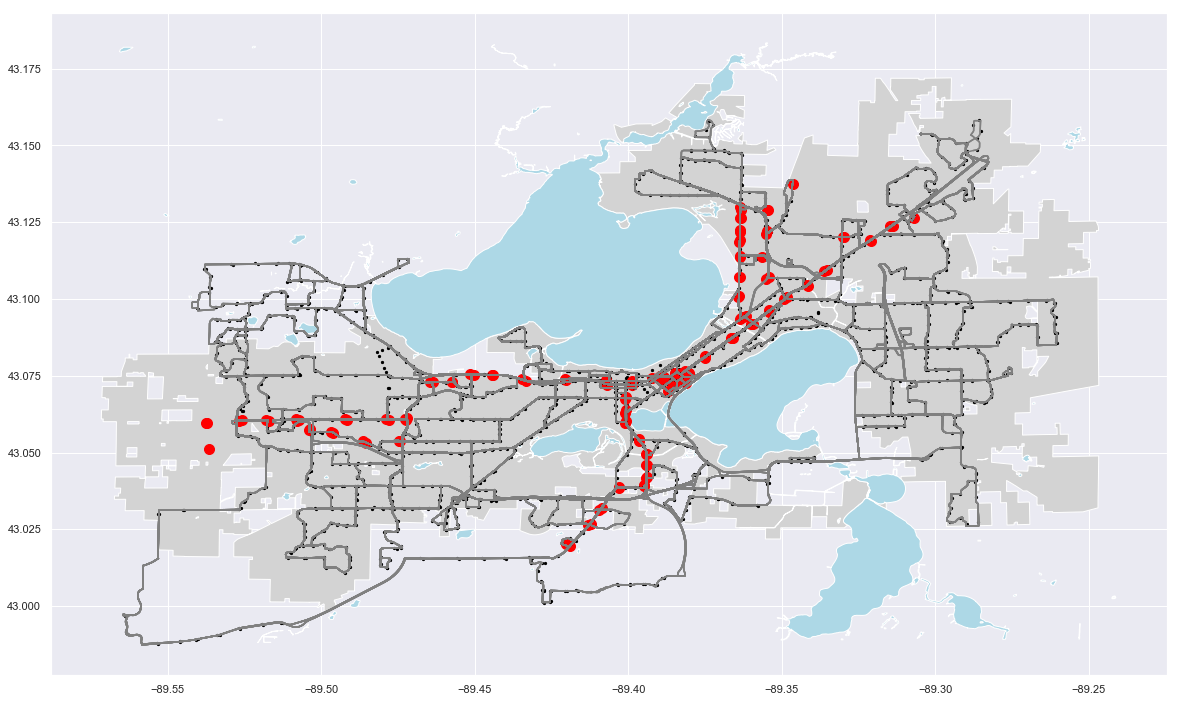

In [59]:
#mapping of the route line string
list_transit = []
for index, row in transit_data_weekday.iterrows():
    list_transit.append(row["geometry"])
    
transit_series = pd.Series(list_transit)
transit_coord = pd.DataFrame({"Coordinates": transit_series})
transit_coord = geopandas.GeoDataFrame(transit_coord, geometry='Coordinates')

ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
transit_coord.plot(color='grey', ax=ax)
metro_coord.plot(color="black", ax=ax, markersize= 5)
brt_coord.plot(color="red", ax=ax, markersize= 100)